# Simple Linear Regression

**Objective - Find a line that best fits the data**

```
hx = b0 + b1*x

J(b0, b1) = sum((hx - y)^2) / 2n

b1 = SSxy / SSxx

b0 = mean_y - b1 * mean_x

SSxy = sum(x*y) - size(x) * mean_x * mean_y

SSxx = sum(x*x) - size(x) * mean_x * mean_x

```



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
dataset = [[1, 2], [2, 4], [3, 9], [4, 8], [5, 12], [6, 17], [7, 21], [8, 56]]

In [3]:
x = np.array([i[0] for i in dataset])
y = np.array([i[1] for i in dataset])

print(x, y)

[1 2 3 4 5 6 7 8] [ 2  4  9  8 12 17 21 56]


In [0]:
def calculate_parameters(x, y):
    
    n = np.size(x)
    
    m_x, m_y = np.mean(x), np.mean(y)
    
    SSxy = np.sum(y*x) - n*m_x*m_y
    
    SSxx = np.sum(x*x) - n*m_x*m_x
    
    b1 = SSxy / SSxx
    
    b0 = m_y - b1 * m_x
    
    return b0, b1

In [0]:
def plot_line(x, y, b):
    
    plt.scatter(x, y, color='m', s=30)
    
    y_pred = b[1]*x + b[0]
    
    
    plt.plot(x, y_pred)
    
    plt.xlabel('x')
    
    plt.ylabel('y')
    
    plt.show()
    


(-10.178571428571427, 5.845238095238095)


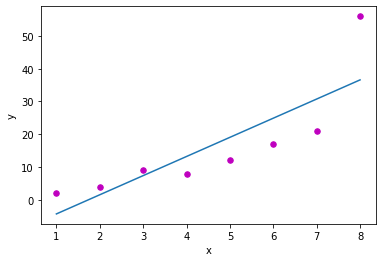

In [6]:
para = calculate_parameters(x, y)

print(para)
plot_line(x, y, para)


# Multiple Linear Regression

**Here we have a lot of features for a single label**

Each feature is transformed into a row and a matrix is formed with rows = no. of input data and columns = length of each row

x = ![x matrix](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-f75095a6db51d533a98e3baf1fa0e984_l3.svg)

![y matrix](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-d166475424075a7edf48bb0b2e2cb2d3_l3.svg)

![alt text](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-53a376e9eea268ddd0447ff65a396325_l3.svg)

![alt text](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-13eb3456642e6393f69813da700518b8_l3.svg)

In [0]:
from sklearn import linear_model, datasets ,metrics

In [0]:
boston = datasets.load_boston()

In [0]:
X = boston.data
y = boston.target

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.4, random_state=1)

In [16]:
reg = linear_model.LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print("regression coefficients", reg.coef_)

regression coefficients [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]


In [22]:
print("variance score", reg.score(X_test, Y_test))

variance score 0.7209056672661777


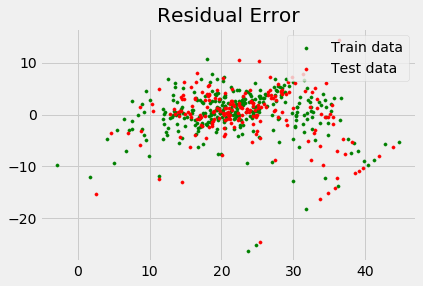

In [33]:
plt.style.use('fivethirtyeight') 


plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train, color = 'green', s=10, label = 'Train data')

plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test, color = 'red', s = 10, label = 'Test data')

plt.legend(loc = 'upper right')

plt.title('Residual Error')

plt.show()